# Day 3 Data Visualization with Python - Exercises with answers

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.

#### Answer:

In [ ]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from plotly import tools

In [2]:
# Set `home_dir` to the root directory of your computer.
home_dir = os.path.expanduser("~")
# Set `main_dir` to the location of your `skillsoft-data-viz-with-python` folder.
main_dir = os.path.join(home_dir, "Desktop", "skillsoft-data-viz-with-python")

# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = os.path.join(main_dir, "data")

# Create a plot directory to save our plots
plot_dir = os.path.join(main_dir, "plots")

In [3]:
# Set working directory.
os.chdir(data_dir)

In [ ]:
# Check working directory.
print(os.getcwd())

#### Question 2
##### Load the pickled data frames `ex_viz`, `ex_grouped_mean_long`, `ex_grouped_mean_wide`.
##### Save them with the same names as the pickled dataframes.
##### Create a color dictionary called `ex_color_dict` corresponding with `per_capita_income`:
- 0 corresponding to color `darkorange`
- 1 corresponding to color `skyblue`

##### Hint: Recall what we did in Day 2 Exercise 2 Question 2!

#### Answer:

In [5]:
ex_viz = pickle.load(open("ex_viz.sav","rb"))
ex_grouped_mean_long = pickle.load(open("ex_grouped_mean_long.sav","rb"))
ex_grouped_mean_wide = pickle.load(open("ex_grouped_mean_wide.sav","rb"))

In [6]:
ex_color_dict = {0: 'darkorange', 1: 'skyblue'}
color = ex_viz['per_capita_income'].map(ex_color_dict)

#### Question 3
##### Let's create a multiple layered scatterplot using the `plt.subplots()` function.
##### Define the `key` and `value` for the color dictionary `ex_color_dict`. 
##### Set the `per_capita_income` as `Below Mean Income` and `Above Mean Income` for key value `0` and `1` respectively.
##### View the plot.
##### Hint: It's always better to clear the plotting area before rendering a new plot by using `plt.clf()`.

#### Answer:

<Figure size 432x288 with 0 Axes>

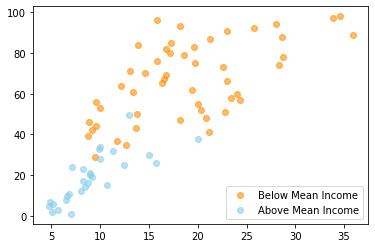

In [7]:
plt.clf()                  #<- clear plotting area
fig, axes = plt.subplots() #<- create a new figure and axes objects for plotting

for key, value in ex_color_dict.items():

    percent_16_unemployed = ex_viz.query('per_capita_income=='+str(key))['percent_16_unemployed']
    hardship_index = ex_viz.query('per_capita_income=='+str(key))['hardship_index']

    if key == 0:
        income = "Below Mean Income"
    else:
        income = "Above Mean Income"

    axes.scatter(percent_16_unemployed, 
                 hardship_index, 
                 c = value, 
                 label = income,
                 alpha = 0.6)
axes.legend()  #<- add a legend that would automatically get labels and colors from layers!            


#### Question 4
##### Create a layered bar chart using the variables from the dataset.
##### Find the means of the data when `per_capita_income` is 1 and save as `ex_true_means`.
##### Find the means of the data when `per_capita_income` is 0 and save as `ex_false_means`.
##### Find the bar heights for both 1 and 0 levels of `per_capita_income` .
##### Also define the other variables `bar_labels`, `num_bars`, `bar_position` and `width` necessary for a bar chart.
##### Clear the plotting area for a new plot and use `plt.subplot()` to visualize the bar chart.

#### Answer:

In [8]:
# We already have `per_capita_income` = 1 mean data.
ex_true_means = ex_grouped_mean_long.query('per_capita_income == 1')[['metric','mean']]
print(ex_true_means)

                         metric       mean
1         percent_house_crowded   2.478571
3   percent_house_below_poverty  12.739286
5         percent_16_unemployed   9.146429
7    percent_25_without_diploma  10.042857
9             percent_dependent  30.153571
11               hardship_index  18.910946


In [9]:
# Let's get the `per_capita_income` = 0 mean data.
ex_false_means = ex_grouped_mean_long.query('per_capita_income == 0')[['metric','mean']]
print(ex_false_means)

                         metric    mean
0         percent_house_crowded   6.288
2   percent_house_below_poverty  26.780
4         percent_16_unemployed  18.810
6    percent_25_without_diploma  26.092
8             percent_dependent  38.834
10               hardship_index  66.640


In [10]:
# Mean values for per_capita_income 0 data.
false_bar_heights = ex_false_means['mean'] 
# Mean values for per_capita_income 1 data.
true_bar_heights = ex_true_means['mean']  
# Labels of bars, their width, and positions are shared for both categories.
bar_labels = ex_false_means['metric'] 
num_bars = len(bar_labels)
bar_positions = np.arange(num_bars)       
width = 0.35


<Figure size 432x288 with 0 Axes>

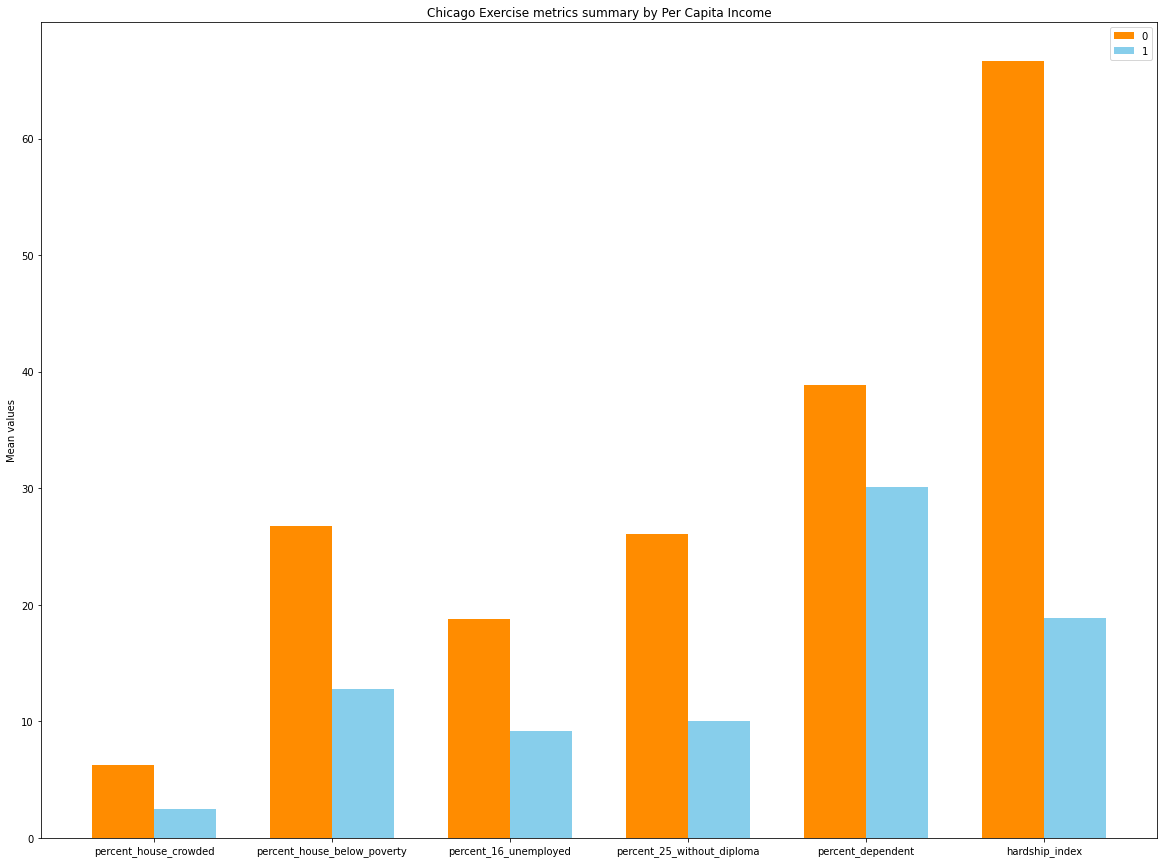

In [11]:
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()

false_bar_chart = axes.bar(bar_positions,          #<- set `false` bar positions
                            false_bar_heights,     #<- set `false` bar heights
                            width,                 #<- set width of the bars
                            color = ex_color_dict[0]) #<- set color to corresponding to `False` in dictionary
true_bar_chart = axes.bar(bar_positions + width, #<- set `true` bar positions 
                          true_bar_heights,      #<- set `true` bar heights
                          width,                 #<- set width of the bars
                          color = ex_color_dict[1]) #<- set 


# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Chicago Exercise metrics summary by Per Capita Income')
axes.set_xticks(bar_positions + width/2)

axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend((false_bar_chart, true_bar_chart), (0, 1))

# Adjust figure size.
fig.set_size_inches(20, 15)


#### Question 5
##### Save the current plot with fig.savefig() to the `chicago_metrics_by_income.png` in your `plots` folder.
##### Save the data `ex_grouped_mean_long` to a csv file named `chicago_summary_by_income.csv`.

#### Answer:

In [15]:
fig.savefig(main_dir + '/plots/chicago_metrics_by_income.png')

In [16]:
ex_grouped_mean_long.to_csv(data_dir + '/chicago_summary_by_income.csv', 
                                   index = False)

## Exercise 2

#### Question 1
##### Set up the initialization steps for offline plotting.
##### Set `connected` as `True` for `init_notebook_mode()` and set `cufflinks` as offline.
##### Use pickle to load `ex_viz.sav`  
##### Save it as `chicago_census`.

#### Answer:

In [17]:
init_notebook_mode(connected = True)
cf.go_offline()

In [18]:
chicago_census = pickle.load(open('ex_viz.sav', 'rb'))

#### Question 2
##### Use `.iplot()` to create a simple histogram of `percent_16_unemployed`.
##### Specify the labels of the axes and the plot title.

#### Answer:

In [19]:
chicago_census['percent_16_unemployed'].iplot(kind = 'hist',
                                              xTitle = 'percent_16_unemployed',
                                              yTitle = 'Frequency', 
                                              title = 'Unemployment distribution')

#### Question 3
##### Now construct a boxplot of `hardship_index`.
##### Set the theme as `solar`. Also label `xTitle` and `title`.

#### Answer:

In [20]:
chicago_census['hardship_index'].iplot(kind ='box',
                                      theme = 'solar',
                                      xTitle = 'Hardship index',
                                      title = 'Hardship index distribution')  

#### Question 4
##### Create a simple scatterplot with `hardship_index` on the x-axis and `percent_house_below_poverty` on the y-axis.
##### Set `color` as `indigo` and `mode` as `markers`.
##### Specify the title of the plot.

#### Answer:

In [21]:
chicago_census.iplot(
              kind = 'scatter', 
              x = 'hardship_index', 
              y = 'percent_house_below_poverty',
              color = 'indigo',
              title = 'Hardship index vs house below poverty(%)',
              mode = 'markers')  